## Imports

In [57]:
import pandas as pd
import numpy as np
import yfinance as yf

from pyhhmm.gaussian import GaussianHMM
from pandas_datareader.data import DataReader

import matplotlib.pyplot as plt

## Data Management

In [58]:
# Data extraction
start_date = "2019-01-03"
end_date = "2024-12-31"
symbol = "BTC-USD"
data = yf.download(symbol, start=start_date, end=end_date)
# data = DataReader(name=symbol, data_source='yahoo', start=start_date, end=end_date)
data = data[["Open", "High", "Low", "Close", "Volume"]]
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price              Open         High          Low        Close      Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD     BTC-USD
Date                                                                      
2019-01-03  3931.048584  3935.685059  3826.222900  3836.741211  4530215219
2019-01-04  3832.040039  3865.934570  3783.853760  3857.717529  4847965467
2019-01-05  3851.973877  3904.903076  3836.900146  3845.194580  5137609824
2019-01-06  3836.519043  4093.297363  3826.513184  4076.632568  5597027440
2019-01-07  4078.584961  4092.613525  4020.894043  4025.248291  5228625637


In [59]:
# Add Returns and Range
df = data.copy()
df["Returns"] = (df["Close"] / df["Close"].shift(1)) - 1
df["Range"] = (df["High"] / df["Low"]) - 1
df.dropna(inplace=True)
df.head()

Price,Open,High,Low,Close,Volume,Returns,Range
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,
Date,,,,,,,
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,4847965467,0.005467,0.021692
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,5137609824,-0.003246,0.017723
2019-01-06,3836.519043,4093.297363,3826.513184,4076.632568,5597027440,0.060189,0.069720
2019-01-07,4078.584961,4092.613525,4020.894043,4025.248291,5228625637,-0.012605,0.017837
2019-01-08,4028.472168,4109.020996,3996.955322,4030.847900,5306593305,0.001391,0.028038


In [60]:
# Structure Data
X_train = df[["Returns", "Range"]]
X_train.head()

Price,Returns,Range
Ticker,,
Date,,
2019-01-04,0.005467,0.021692
2019-01-05,-0.003246,0.017723
2019-01-06,0.060189,0.069720
2019-01-07,-0.012605,0.017837
2019-01-08,0.001391,0.028038


## HMM Learning

In [61]:
#Train Model
model = GaussianHMM(n_states=4, covariance_type='full', n_emissions=2)
model.train([np.array(X_train.values)])

/Users/pauliusmipauliusnialga/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(<pyhhmm.gaussian.GaussianHMM at 0x14def9450>, 10616.546606131682)

In [62]:
# Check Results
hidden_states = model.predict([X_train.values])[0]
print(hidden_states[:40])
len(hidden_states)
# print(set(hidden_states))


[1 1 3 1 1 1 0 1 1 0 3 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 3 1
 1 1 1]


2188

In [63]:
#Regime state means for each feature
model.means

array([[-0.02327489,  0.04828408],
       [ 0.00120005,  0.02540551],
       [-0.00138541,  0.12140736],
       [ 0.03127509,  0.04810305]])

In [64]:
# Regime state covars for each feature
model.covars

array([[[ 4.39637991e-04, -3.14330981e-04],
        [-3.14330981e-04,  5.11383747e-04]],

       [[ 1.34376827e-04,  2.83296351e-05],
        [ 2.83296351e-05,  1.30186770e-04]],

       [[ 5.84315181e-03, -1.37019581e-03],
        [-1.37019581e-03,  4.69633842e-03]],

       [[ 6.14272158e-04,  5.62087506e-04],
        [ 5.62087506e-04,  6.16827785e-04]]])

## Data Visualization

In [68]:
# Structure the prices for plotting
i = 0
labels_0 = []
labels_1 = []
labels_2 = []
labels_3 = []
prices = df["Close"].values.astype(float)
print("Correct number of rows: ", len(prices) == len(hidden_states))
for s in hidden_states:
    if s == 0:
        labels_0.append(prices[i])
        labels_1.append(np.nan)
        labels_2.append(np.nan)
        labels_3.append(np.nan)
    if s == 1:
        labels_0.append(np.nan)
        labels_1.append(prices[i])
        labels_2.append(np.nan)
        labels_3.append(np.nan)
    if s == 2:
        labels_0.append(np.nan)
        labels_1.append(np.nan)
        labels_2.append(prices[i])
        labels_3.append(np.nan)
    if s == 3:
        labels_0.append(np.nan)
        labels_1.append(np.nan)
        labels_2.append(np.nan)
        labels_3.append(prices[i])
    i += 1

Correct number of rows:  True


In [73]:
print(f"Type of labels_0: {type(labels_0)}, Length: {len(labels_0)}")
print(f"Type of labels_1: {type(labels_1)}, Length: {len(labels_1)}")
print(f"Type of labels_2: {type(labels_2)}, Length: {len(labels_2)}")
print(f"Type of labels_3: {type(labels_3)}, Length: {len(labels_3)}")
len(hidden_states)

print(f"First 10 elements of labels_0: {labels_0[:10]}")
print(f"First 10 elements of labels_1: {labels_1[:10]}")
print(f"First 10 elements of labels_2: {labels_2[:10]}")
print(f"First 10 elements of labels_3: {labels_3[:10]}")



Type of labels_0: <class 'list'>, Length: 2188
Type of labels_1: <class 'list'>, Length: 2188
Type of labels_2: <class 'list'>, Length: 2188
Type of labels_3: <class 'list'>, Length: 2188
First 10 elements of labels_0: [nan, nan, nan, nan, nan, nan, array([3678.92456055]), nan, nan, array([3552.953125])]
First 10 elements of labels_1: [array([3857.7175293]), array([3845.19458008]), nan, array([4025.24829102]), array([4030.84790039]), array([4035.29638672]), nan, array([3687.36547852]), array([3661.30102539]), nan]
First 10 elements of labels_2: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
First 10 elements of labels_3: [nan, nan, array([4076.63256836]), nan, nan, nan, nan, nan, nan, nan]


ValueError: Input could not be cast to an at-least-1D NumPy array

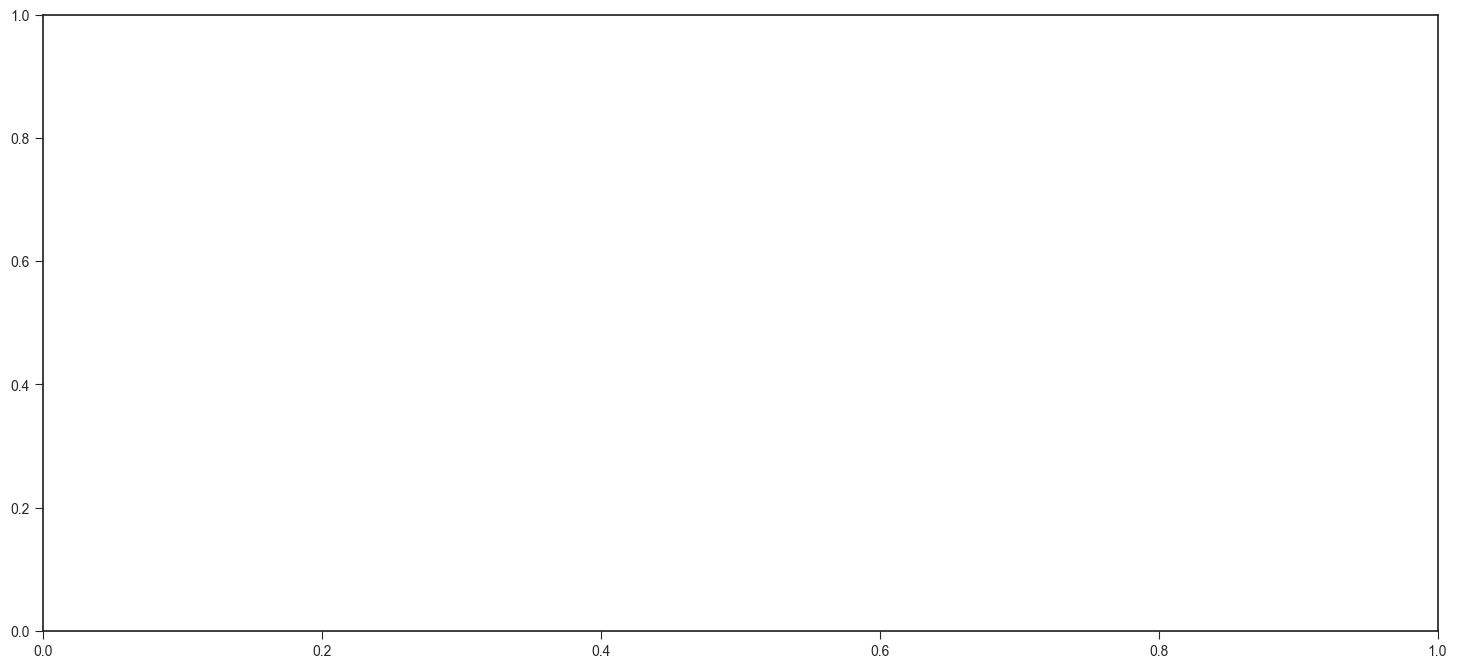

In [70]:
# Plot Chart
fig = plt.figure(figsize=(18, 8))
plt.plot(labels_0, color="green")
plt.plot(labels_1, color="red")
plt.plot(labels_2, color="orange")
plt.plot(labels_3, color="black")
plt.show()
# dummy_data = [1, 2, np.nan, 4, 5]
# fig = plt.figure(figsize=(18, 8))
# plt.plot(range(len(dummy_data)), dummy_data, color="blue")
# plt.show()